## PCA for top 50 variables

### THIS CODE IS ONLY USED FOR SAVING THE TOP 50 PCA DESCRIPTORS, ALL OTHER CODE SHOULD BE IGNORED!

#### loading the libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score, confusion_matrix,balanced_accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

#### loading the dataset

In [3]:
tested_data = pd.read_csv('tested_molecules_with_descriptors.csv')
tested_data.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,0,0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,...,0,0,0,0,0,0,0,0,0,0


In [4]:
untested_data = pd.read_csv('untested_molecules_with_descriptors.csv')
untested_data.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C[C@@H](Sc1nc(=O)cc(N)[nH]1)C(=O)NC1CCCCC1,NaN,NaN,12.102478,12.102478,0.021321,-0.399409,0.573774,17.650000,296.396,...,1,0,0,0,0,0,0,0,0,0
1,O=C(CCN1C(=O)COc2ccccc21)NCc1cccs1,NaN,NaN,11.985063,11.985063,0.021654,-0.120596,0.919617,13.454545,316.382,...,0,0,0,0,0,0,0,1,0,0
2,Cn1nnnc1SCC(=O)N1CC[NH+](Cc2ccccc2)CC1,NaN,NaN,12.287562,12.287562,0.163668,0.163668,0.727985,15.782609,333.441,...,1,0,0,0,1,0,0,0,0,0
3,CCOC(=O)CCP(=O)([O-])[C@@H](O)c1ccc(OC)cc1,NaN,NaN,11.932898,11.932898,0.197446,-4.142696,0.601737,12.800000,301.255,...,0,0,0,0,0,0,0,0,0,0
4,C=CCNC(=O)c1cc(-c2ccccc2O)on1,NaN,NaN,11.589256,11.589256,0.075648,-0.346925,0.806028,10.000000,244.250,...,0,0,0,0,0,0,0,0,0,0


#### splitting the data

In [5]:
# Separate the features (X) and targets (y)
X = tested_data.drop(columns=['SMILES', 'PKM2_inhibition', 'ERK2_inhibition'])
y_PKM2 = tested_data['PKM2_inhibition']
y_ERK2 = tested_data['ERK2_inhibition']

# Split the data into training and test sets
X_train_PKM2, X_test_PKM2, y_train_PKM2, y_test_PKM2 = train_test_split(X, y_PKM2, test_size=0.2, random_state=42)
X_train_ERK2, X_test_ERK2, y_train_ERK2, y_test_ERK2 = train_test_split(X, y_ERK2, test_size=0.2, random_state=42)

#### selecting top 50 variables using random forest

In [6]:
# Define a function to select top 50 features
def select_top_features(X_train, y_train):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    importances = rf.feature_importances_
    indices = importances.argsort()[-50:]  # Get the indices of the top 50 features
    
    X_train_selected = X_train.iloc[:, indices]
    return X_train_selected, indices

# Select top 50 features for PKM2 and ERK2
X_train_PKM2_selected, indices_PKM2 = select_top_features(X_train_PKM2, y_train_PKM2)
X_train_ERK2_selected, indices_ERK2 = select_top_features(X_train_ERK2, y_train_ERK2)

# Apply the same feature selection to the test sets
X_test_PKM2_selected = X_test_PKM2.iloc[:, indices_PKM2]
X_test_ERK2_selected = X_test_ERK2.iloc[:, indices_ERK2]


#### performing PCA on top 50 variables

In [7]:
# Define a function to apply PCA
def apply_pca(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    return X_train_pca, X_test_pca

# Apply PCA to the selected features for PKM2 and ERK2
X_train_PKM2_pca, X_test_PKM2_pca = apply_pca(X_train_PKM2_selected, X_test_PKM2_selected)
X_train_ERK2_pca, X_test_ERK2_pca = apply_pca(X_train_ERK2_selected, X_test_ERK2_selected)



### Train and test the model using random forest

PKM2 Model Accuracy: 82.59%
PKM2 Balanced Accuracy: 82.95%
PKM2 Confusion Matrix:


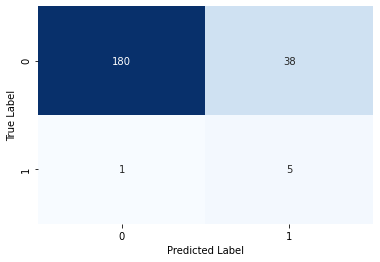

PKM2 Classification Report:
              precision  recall  f1-score   support
0                 99.45   82.57     90.23  21800.00
1                 11.63   83.33     20.41    600.00
accuracy          82.59   82.59     82.59     82.59
macro avg         55.54   82.95     55.32  22400.00
weighted avg      97.10   82.59     88.36  22400.00
ERK2 Model Accuracy: 71.43%
ERK2 Balanced Accuracy: 50.00%
ERK2 Confusion Matrix:


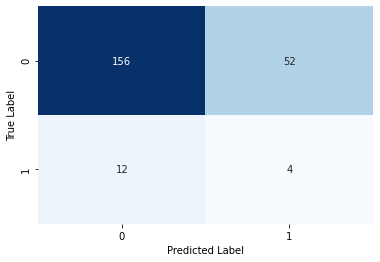

ERK2 Classification Report:
              precision  recall  f1-score   support
0                 92.86   75.00     82.98  20800.00
1                  7.14   25.00     11.11   1600.00
accuracy          71.43   71.43     71.43     71.43
macro avg         50.00   50.00     47.04  22400.00
weighted avg      86.73   71.43     77.85  22400.00


In [8]:
# Define a function to train and evaluate the model
def train_and_evaluate(X_train, y_train, X_test, y_test):
    # Calculate class weights
    class_weights = {0: 1, 1: len(y_train) / sum(y_train == 1)}
    
    model = LogisticRegression(random_state=42, class_weight=class_weights)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred) * 100
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    return model, accuracy, balanced_accuracy, conf_matrix, class_report

# Train and evaluate the model for PKM2
model_PKM2, accuracy_PKM2, balanced_accuracy_PKM2, conf_matrix_PKM2, class_report_PKM2 = train_and_evaluate(X_train_PKM2_pca, y_train_PKM2, X_test_PKM2_pca, y_test_PKM2)
print(f'PKM2 Model Accuracy: {accuracy_PKM2:.2f}%')
print(f'PKM2 Balanced Accuracy: {balanced_accuracy_PKM2:.2f}%')
print('PKM2 Confusion Matrix:')
sns.heatmap(conf_matrix_PKM2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('PKM2 Classification Report:')
print(pd.DataFrame(class_report_PKM2).transpose().apply(lambda x: round(x * 100, 2)))

# Train and evaluate the model for ERK2
model_ERK2, accuracy_ERK2, balanced_accuracy_ERK2, conf_matrix_ERK2, class_report_ERK2 = train_and_evaluate(X_train_ERK2_pca, y_train_ERK2, X_test_ERK2_pca, y_test_ERK2)
print(f'ERK2 Model Accuracy: {accuracy_ERK2:.2f}%')
print(f'ERK2 Balanced Accuracy: {balanced_accuracy_ERK2:.2f}%')
print('ERK2 Confusion Matrix:')
sns.heatmap(conf_matrix_ERK2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('ERK2 Classification Report:')
print(pd.DataFrame(class_report_ERK2).transpose().apply(lambda x: round(x * 100, 2)))




#### selecting top 50 variables using selectKbest

In [9]:
# Define a function to select top 50 features using SelectKBest
def select_top_features(X_train, y_train):
    selector = SelectKBest(score_func=f_classif, k=50)
    X_train_selected = selector.fit_transform(X_train, y_train)
    indices = selector.get_support(indices=True)
    return X_train_selected, indices

# Select top 50 features for PKM2 and ERK2
X_train_PKM2_selected, indices_PKM2 = select_top_features(X_train_PKM2, y_train_PKM2)
X_train_ERK2_selected, indices_ERK2 = select_top_features(X_train_ERK2, y_train_ERK2)

# Apply the same feature selection to the test sets
X_test_PKM2_selected = X_test_PKM2.iloc[:, indices_PKM2]
X_test_ERK2_selected = X_test_ERK2.iloc[:, indices_ERK2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 10  69  82  86 138 147 148 156 157 160 162 164 170 171 174 175 183 184
 185 186 192 193 197 203 206] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 10  69  82  86 138 147 148 156 157 160 162 164 170 171 174 175 183 184
 185 186 192 193 197 203 206] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


#### performing pca on top 50 variables

In [10]:
# Define a function to apply PCA
def apply_pca(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    return X_train_pca, X_test_pca

# Apply PCA to the selected features for PKM2 and ERK2
X_train_PKM2_pca, X_test_PKM2_pca = apply_pca(X_train_PKM2_selected, X_test_PKM2_selected)
X_train_ERK2_pca, X_test_ERK2_pca = apply_pca(X_train_ERK2_selected, X_test_ERK2_selected)


### Train and test the model using selectKbest

PKM2 Model Accuracy: 85.27%
PKM2 Balanced Accuracy: 84.33%
PKM2 Confusion Matrix:


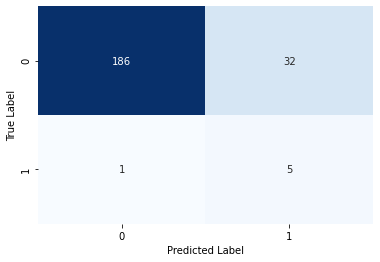

PKM2 Classification Report:
              precision  recall  f1-score   support
0                 99.47   85.32     91.85  21800.00
1                 13.51   83.33     23.26    600.00
accuracy          85.27   85.27     85.27     85.27
macro avg         56.49   84.33     57.55  22400.00
weighted avg      97.16   85.27     90.01  22400.00
ERK2 Model Accuracy: 69.64%
ERK2 Balanced Accuracy: 51.92%
ERK2 Confusion Matrix:


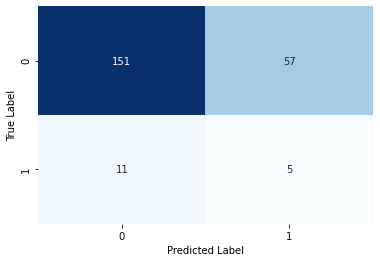

ERK2 Classification Report:
              precision  recall  f1-score   support
0                 93.21   72.60     81.62  20800.00
1                  8.06   31.25     12.82   1600.00
accuracy          69.64   69.64     69.64     69.64
macro avg         50.64   51.92     47.22  22400.00
weighted avg      87.13   69.64     76.71  22400.00


In [11]:
# Define a function to train and evaluate the model
def train_and_evaluate(X_train, y_train, X_test, y_test):
    # Calculate class weights
    class_weights = {0: 1, 1: len(y_train) / sum(y_train == 1)}
    
    model = LogisticRegression(random_state=42, class_weight=class_weights)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred) * 100
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    return model, accuracy, balanced_accuracy, conf_matrix, class_report

# Train and evaluate the model for PKM2
model_PKM2, accuracy_PKM2, balanced_accuracy_PKM2, conf_matrix_PKM2, class_report_PKM2 = train_and_evaluate(X_train_PKM2_pca, y_train_PKM2, X_test_PKM2_pca, y_test_PKM2)
print(f'PKM2 Model Accuracy: {accuracy_PKM2:.2f}%')
print(f'PKM2 Balanced Accuracy: {balanced_accuracy_PKM2:.2f}%')
print('PKM2 Confusion Matrix:')
sns.heatmap(conf_matrix_PKM2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('PKM2 Classification Report:')
print(pd.DataFrame(class_report_PKM2).transpose().apply(lambda x: round(x * 100, 2)))

# Train and evaluate the model for ERK2
model_ERK2, accuracy_ERK2, balanced_accuracy_ERK2, conf_matrix_ERK2, class_report_ERK2 = train_and_evaluate(X_train_ERK2_pca, y_train_ERK2, X_test_ERK2_pca, y_test_ERK2)
print(f'ERK2 Model Accuracy: {accuracy_ERK2:.2f}%')
print(f'ERK2 Balanced Accuracy: {balanced_accuracy_ERK2:.2f}%')
print('ERK2 Confusion Matrix:')
sns.heatmap(conf_matrix_ERK2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('ERK2 Classification Report:')
print(pd.DataFrame(class_report_ERK2).transpose().apply(lambda x: round(x * 100, 2)))


In [12]:
# Calculate combined accuracy and balanced accuracy
combined_accuracy = (accuracy_PKM2 + accuracy_ERK2) / 2
combined_balanced_accuracy = (balanced_accuracy_PKM2 + balanced_accuracy_ERK2) / 2 

print(f'Combined Accuracy: {combined_accuracy:.2f}%')
print(f'Combined Balanced Accuracy: {combined_balanced_accuracy:.2f}%')



Combined Accuracy: 77.46%
Combined Balanced Accuracy: 68.13%


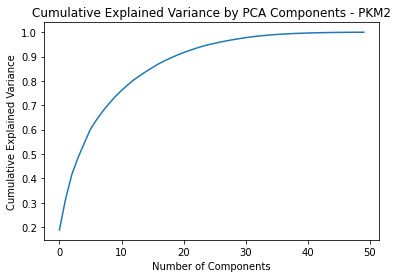

Results of logistic regression for prediction of PKM2 inhibition
Accuracy: 93.13%
Balanced accuracy: 88.32%
Confusion Matrix:
 [[307  22]
 [  1   5]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       329
           1       0.19      0.83      0.30         6

    accuracy                           0.93       335
   macro avg       0.59      0.88      0.63       335
weighted avg       0.98      0.93      0.95       335



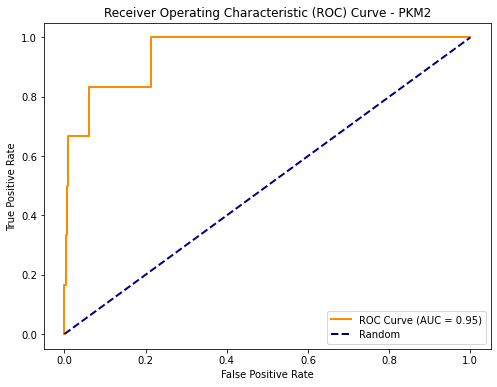

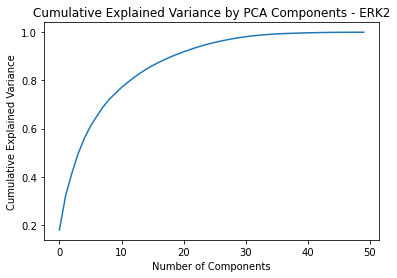

Results of logistic regression for prediction of ERK2 inhibition
Accuracy: 87.16%
Balanced accuracy: 56.10%
Confusion Matrix:
 [[288  28]
 [ 15   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       316
           1       0.12      0.21      0.16        19

    accuracy                           0.87       335
   macro avg       0.54      0.56      0.54       335
weighted avg       0.90      0.87      0.89       335



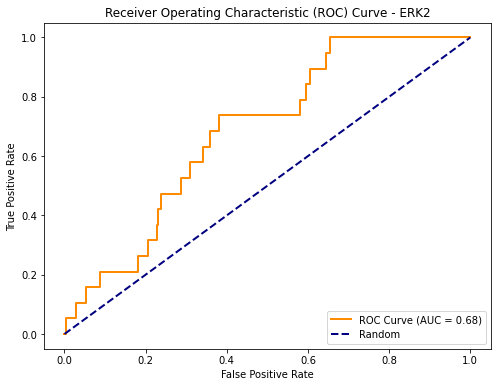

In [13]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc

# Drop unnecessary columns and prepare the dataset
df_tested_data = tested_data.drop(columns=['PKM2_inhibition', 'ERK2_inhibition', 'SMILES'])

# Remove features with low variance
constant_filter = VarianceThreshold(threshold=0.0)
X_constant_removed = constant_filter.fit_transform(df_tested_data)
columns_kept = df_tested_data.columns[constant_filter.get_support()]
X_filtered = pd.DataFrame(X_constant_removed, columns=columns_kept)

# Compute correlation matrix and select upper triangle of correlation matrix
corr_matrix = X_filtered.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95 and drop them
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_filtered = X_filtered.drop(columns=to_drop)

# Univariate feature selection for PKM2
selector_PKM2 = SelectKBest(score_func=f_classif, k=50)
X_best_PKM2 = selector_PKM2.fit_transform(X_filtered, y_PKM2)

# Univariate feature selection for ERK2
selector_ERK2 = SelectKBest(score_func=f_classif, k=50)
X_best_ERK2 = selector_ERK2.fit_transform(X_filtered, y_ERK2)

# Scale the features
scaler = MinMaxScaler()

# Function to train and evaluate model
def train_and_evaluate(X, y, dataset_name):
    X = scaler.fit_transform(X)
    
    # Split the data into training and test data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
    
    # Decide the number of PCA components based on the retained information
    pca = PCA()
    pca.fit(X_train)
    explained_variance = pca.explained_variance_ratio_.cumsum()
    plt.plot(explained_variance)
    plt.title(f'Cumulative Explained Variance by PCA Components - {dataset_name}')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()

    # Determine the number of components needed to explain 90% of the variance
    desired_variance = 0.90
    num_components = (np.argmax(explained_variance >= desired_variance) + 1)

    # Apply PCA with the determined number of components
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    highest_BAcc_result = float('-inf')
    best_y_pred = None
    best_y_prob = None
    for i in range(20):
        logr_model = LogisticRegression(class_weight={0: 1, 1: i})  # Adjust weights
        logr_model.fit(X_train_pca, y_train)

        y_pred = logr_model.predict(X_test_pca)
        y_prob = logr_model.predict_proba(X_test_pca)[:, 1]
        accuracy = accuracy_score(y_test, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

        if balanced_accuracy > highest_BAcc_result:
            highest_BAcc_result = balanced_accuracy
            highest_acc_result = accuracy
            best_y_pred = y_pred
            best_y_prob = y_prob

    print(f"Results of logistic regression for prediction of {dataset_name} inhibition")
    print(f"Accuracy: {highest_acc_result * 100:.2f}%")
    print(f"Balanced accuracy: {highest_BAcc_result * 100:.2f}%")

    # Evaluate the model
    print("Confusion Matrix:\n", confusion_matrix(y_test, best_y_pred))
    print("\nClassification Report:\n", classification_report(y_test, best_y_pred))

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, best_y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {dataset_name}')
    plt.legend(loc="lower right")
    plt.show()

# Train and evaluate model for PKM2
train_and_evaluate(X_best_PKM2, y_PKM2, "PKM2")

# Train and evaluate model for ERK2
train_and_evaluate(X_best_ERK2, y_ERK2, "ERK2")

# Save the PCA transformed datasets
np.savetxt('X_best_PKM2.csv', X_best_PKM2, delimiter=',')
np.savetxt('X_best_ERK2.csv', X_best_ERK2, delimiter=',')



In [14]:
#total for both 
accuracy= (highest_acc_result_ERK2+ highest_acc_result_PKM2)/2
balanced_accuracy=(highest_BAcc_result_ERK2 + highest_BAcc_result_PKM2)/2
print("Accuracy: {:.2f}%".format(accuracy  * 100))
print("Balanced accuracy: {:.2f}%".format(balanced_accuracy * 100))

NameError: name 'highest_acc_result_ERK2' is not defined

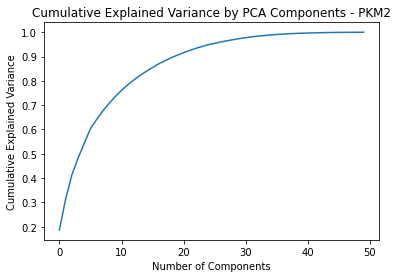

Saved PCA-transformed dataset for PKM2 with 20 components


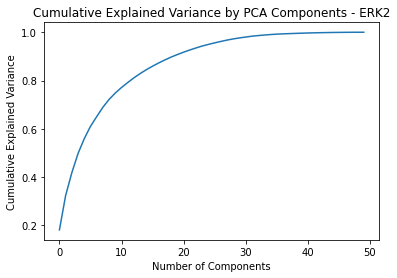

Saved PCA-transformed dataset for ERK2 with 20 components


In [15]:

# Remove features with low variance
constant_filter = VarianceThreshold(threshold=0.0)
X_constant_removed = constant_filter.fit_transform(df_tested_data)
columns_kept = df_tested_data.columns[constant_filter.get_support()]
X_filtered = pd.DataFrame(X_constant_removed, columns=columns_kept)

# Compute correlation matrix and select upper triangle of correlation matrix
corr_matrix = X_filtered.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95 and drop them
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_filtered = X_filtered.drop(columns=to_drop)

# Univariate feature selection for PKM2
selector_PKM2 = SelectKBest(score_func=f_classif, k=50)
X_best_PKM2 = selector_PKM2.fit_transform(X_filtered, y_PKM2)

# Univariate feature selection for ERK2
selector_ERK2 = SelectKBest(score_func=f_classif, k=50)
X_best_ERK2 = selector_ERK2.fit_transform(X_filtered, y_ERK2)

# Scale the features
scaler = MinMaxScaler()

# Function to apply PCA and save datasets
def apply_pca_and_save(X, y, dataset_name):
    X_scaled = scaler.fit_transform(X)
    
    # Decide the number of PCA components based on the retained information
    pca = PCA()
    pca.fit(X_scaled)
    explained_variance = pca.explained_variance_ratio_.cumsum()
    plt.plot(explained_variance)
    plt.title(f'Cumulative Explained Variance by PCA Components - {dataset_name}')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()

    # Determine the number of components needed to explain 90% of the variance
    desired_variance = 0.90
    num_components = (np.argmax(explained_variance >= desired_variance) + 1)

    # Apply PCA with the determined number of components
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Save the PCA-transformed dataset
    np.savetxt(f'X_{dataset_name}_pca.csv', X_pca, delimiter=',')
    np.savetxt(f'y_{dataset_name}.csv', y, delimiter=',')

    print(f'Saved PCA-transformed dataset for {dataset_name} with {num_components} components')

# Apply PCA and save datasets for PKM2
apply_pca_and_save(X_best_PKM2, y_PKM2, "PKM2")

# Apply PCA and save datasets for ERK2
apply_pca_and_save(X_best_ERK2, y_ERK2, "ERK2")